In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=30)

In [3]:
#Function to get the test report for each model
def test_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_test)
        return(classification_report(y_test,prediction))
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        return(classification_report(y_test_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        return(classification_report(y_test_33,prediction))
def train_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_train)
        return(classification_report(y_train,prediction))
    if test_size==0.20:
        prediction=model.predict(X_train_20)
        return(classification_report(y_train_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_train_33)
        return(classification_report(y_train_33,prediction))
#Function to get the f1-score,precision
def f_p_r(model,test_size,name):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.25 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.33 for ",name," Recall:",recal)
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)
#Function to get the confusion matrix
def confuse_mat(model,test_size):
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        conmat=confusion_matrix(y_test_20,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.25:
        prediction=model.predict(X_test)
        conmat=confusion_matrix(y_test,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        conmat=confusion_matrix(y_test_33,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
#Function to plot the R0C curve
def roc_auc(model,name,test_size):
    if test_size==0.20:
        ns_probs = [0 for _ in range(len(y_test_20))]
        prediction_probs_20=model.predict_proba(X_test_20)
        prediction_probs_20 = prediction_probs_20[:, 1]
        ns_auc = roc_auc_score(y_test_20, ns_probs)
        lr_auc=roc_auc_score(y_test_20,prediction_probs_20)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_20, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_20,prediction_probs_20)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.25:
        ns_probs = [0 for _ in range(len(y_test))]
        prediction_probs=model.predict_proba(X_test)
        prediction_probs = prediction_probs[:, 1]
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc=roc_auc_score(y_test,prediction_probs)
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test,prediction_probs)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.33:
        ns_probs = [0 for _ in range(len(y_test_33))]
        prediction_probs_33=model.predict_proba(X_test_33)
        prediction_probs_33 = prediction_probs_33[:, 1]
        ns_auc = roc_auc_score(y_test_33, ns_probs)
        lr_auc=roc_auc_score(y_test_33,prediction_probs_33)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_33, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_33,prediction_probs_33)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))

In [4]:
#Logistic Regression Model
LR_model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.01,0.1,1,10,100]
LR_grid = dict(solver=solvers,penalty=penalty,C=c_values)
LR_Clf_20=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_20.fit(X_train_20,y_train_20)
print("Logistic Regression Model working with test size=0.20")
print("-------------------------------------------")
params_combine_LR_20=pd.concat([pd.DataFrame(LR_Clf_20.cv_results_["params"]),pd.DataFrame(LR_Clf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",LR_Clf_20.best_params_)
print("Best accuracy score with test size=0.20: ",LR_Clf_20.best_score_)
print("--------------------------------------------------------------------------------------")
LR_Clf_25=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_25.fit(X_train,y_train)
print("Logistic Regression Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_LR_25=pd.concat([pd.DataFrame(LR_Clf_25.cv_results_["params"]),pd.DataFrame(LR_Clf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",LR_Clf_25.best_params_)
print("Best accuracy score with test size=0.25: ",LR_Clf_25.best_score_)
print("--------------------------------------------------------------------------------------")
LR_Clf_33=GridSearchCV(LR_model,param_grid=LR_grid,cv=10)
LR_Clf_33.fit(X_train_33,y_train_33)
print("Logistic Regression Model working with test size=0.33")
print("-------------------------------------------")
params_combine_LR_33=pd.concat([pd.DataFrame(LR_Clf_33.cv_results_["params"]),pd.DataFrame(LR_Clf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_LR_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",LR_Clf_33.best_params_)
print("Best accuracy score with test size=0.33: ",LR_Clf_33.best_score_)
print("--------------------------------------------------------------------------------------")

Logistic Regression Model working with test size=0.20
-------------------------------------------
         C penalty     solver  Accuracy
0     0.01      l2  newton-cg  0.646141
1     0.01      l2      lbfgs  0.646141
2     0.01      l2  liblinear  0.646142
3     0.10      l2  newton-cg  0.720808
4     0.10      l2      lbfgs  0.720808
5     0.10      l2  liblinear  0.723502
6     1.00      l2  newton-cg  0.744860
7     1.00      l2      lbfgs  0.744860
8     1.00      l2  liblinear  0.744282
9    10.00      l2  newton-cg  0.744857
10   10.00      l2      lbfgs  0.744857
11   10.00      l2  liblinear  0.744857
12  100.00      l2  newton-cg  0.745243
13  100.00      l2      lbfgs  0.745243
14  100.00      l2  liblinear  0.745243
-------------------------------------------
Best parameter setting with test size=0.20:  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best accuracy score with test size=0.20:  0.7452434415295687
-------------------------------------------------------------

Best Logistic Regression Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for Logistic Regression with the best parameter settings with test size=0.20


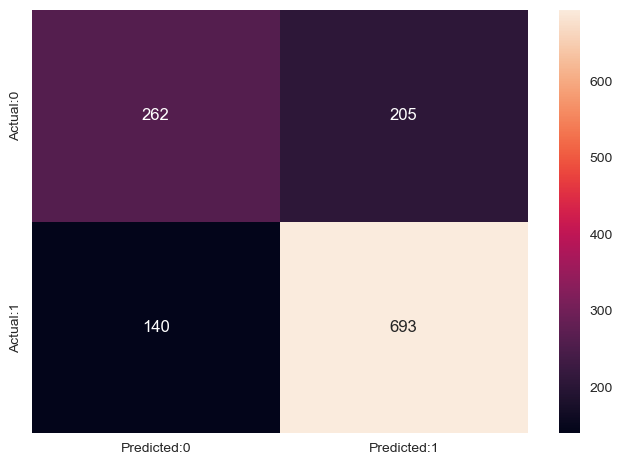

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       467
           1       0.77      0.83      0.80       833

    accuracy                           0.73      1300
   macro avg       0.71      0.70      0.70      1300
weighted avg       0.73      0.73      0.73      1300

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.69      0.57      0.63      1917
           1       0.77      0.85      0.81      3280

    accuracy                           0.75      5197
   macro avg       0.73      0.71      0.72      5197
weighted avg       0.74      0.75      0.74      5197

-----------------------------------------------

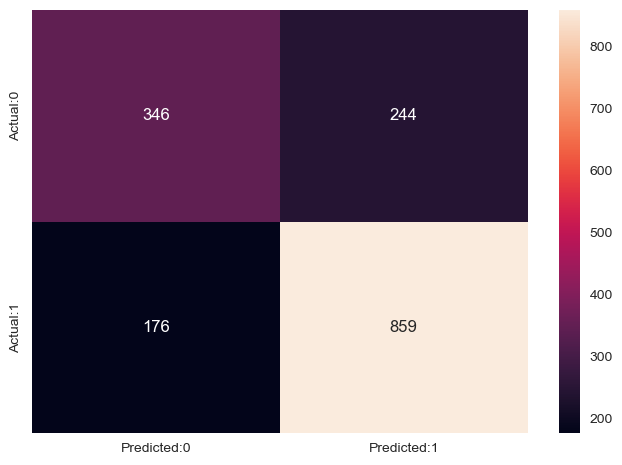

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       590
           1       0.78      0.83      0.80      1035

    accuracy                           0.74      1625
   macro avg       0.72      0.71      0.71      1625
weighted avg       0.74      0.74      0.74      1625

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.69      0.57      0.62      1794
           1       0.77      0.85      0.81      3078

    accuracy                           0.75      4872
   macro avg       0.73      0.71      0.72      4872
weighted avg       0.74      0.75      0.74      4872

-----------------------------------------------

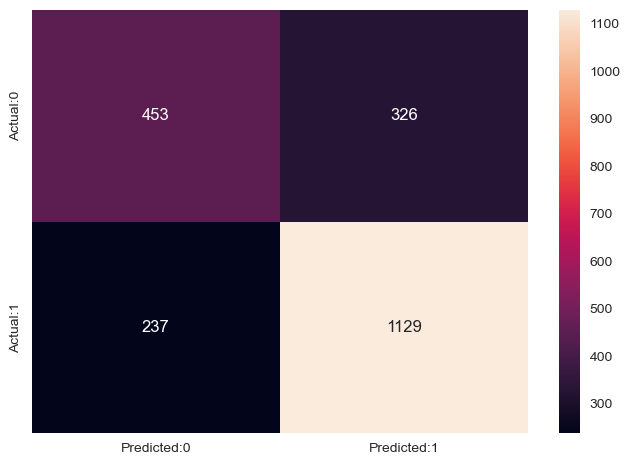

------------------------------------------------------------------
Classification Report for Logistic Regression model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.66      0.58      0.62       779
           1       0.78      0.83      0.80      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.70      0.71      2145
weighted avg       0.73      0.74      0.73      2145

------------------------------------------------------------------
Classification Report for Logistic Regression model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1605
           1       0.78      0.84      0.81      2747

    accuracy                           0.75      4352
   macro avg       0.73      0.71      0.72      4352
weighted avg       0.74      0.75      0.74      4352

-----------------------------------------------

In [5]:
#Now using best parameter setting to run the LR model
best_lr_20=LogisticRegression(C= 100, penalty= 'l2', solver= 'newton-cg')
lr_20=best_lr_20.fit(X_train_20,y_train_20)
print("Best Logistic Regression Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.20")
confuse_mat(lr_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.20")
report=test_report(lr_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.20")
test_repo=train_report(lr_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_lr_25=LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
lr_25=best_lr_25.fit(X_train,y_train)
print("Best SVM Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.25")
confuse_mat(lr_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.25")
report=test_report(lr_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.25")
test_repo=train_report(lr_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_lr_33=LogisticRegression(C= 10, penalty= 'l2', solver= 'newton-cg')
lr_33=best_lr_33.fit(X_train_33,y_train_33)
print("Best SVM Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for Logistic Regression with the best parameter settings with test size=0.33")
confuse_mat(lr_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Test with test size=0.33")
report=test_report(lr_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for Logistic Regression model with Train with test size=0.33")
test_repo=train_report(lr_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")

ROC curve and AUC score for test_size=0.20


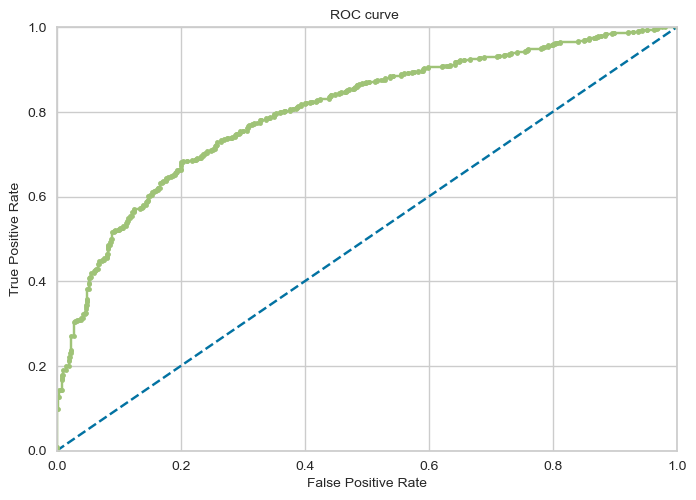

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.801
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


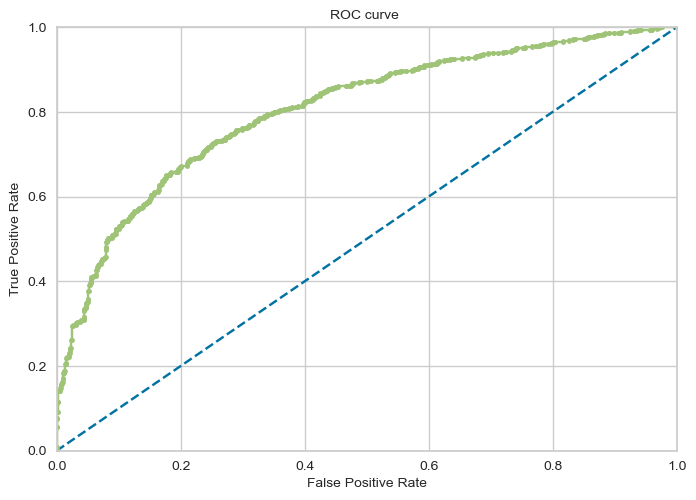

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.805
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


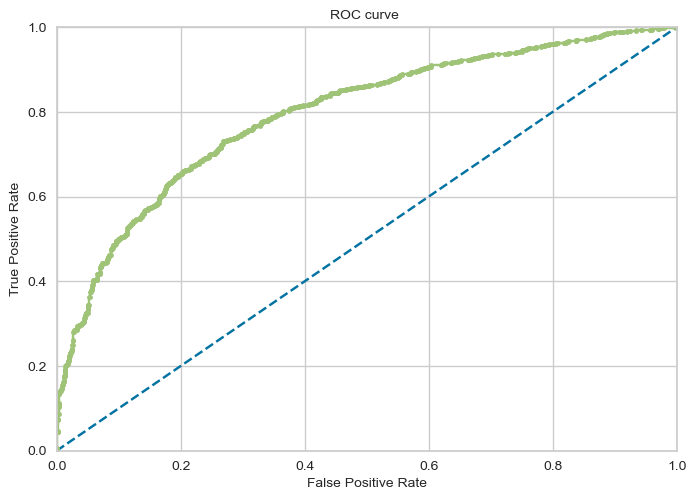

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.795


In [6]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(lr_20,"Logistic Regression",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(lr_25,"Logistic Regression",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(lr_33,"Logistic Regression",0.33)

In [7]:
f_p_r(lr_20,0.20,"Logistic Regression")
print("--------------------------------------------------------------------------------------")
f_p_r(lr_25,0.25,"Logistic Regression")
print("--------------------------------------------------------------------------------------")
f_p_r(lr_33,0.33,"Logistic Regression")

With test_size=0.20 for  Logistic Regression  Recall: 0.6964803051841721
With test_size=0.20 for  Logistic Regression  f1 score: 0.7018425928326549
With test_size=0.20 for  Logistic Regression  precision: 0.7117281077906681
--------------------------------------------------------------------------------------
With test_size=0.25 for  Logistic Regression  Recall: 0.7081961843936788
With test_size=0.25 for  Logistic Regression  f1 score: 0.7129284411572706
With test_size=0.25 for  Logistic Regression  precision: 0.7208101902509005
--------------------------------------------------------------------------------------
With test_size=0.33 for  Logistic Regression  Recall: 0.704007747290234
With test_size=0.33 for  Logistic Regression  f1 score: 0.7085857334215884
With test_size=0.33 for  Logistic Regression  precision: 0.7162333781562826
